In [1]:
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')

nltk.download("stopwords")
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!git clone https://github.com/fivethirtyeight/russian-troll-tweets.git

Cloning into 'russian-troll-tweets'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Unpacking objects: 100% (80/80), 476.17 MiB | 5.05 MiB/s, done.
Updating files: 100% (14/14), done.


In [3]:
import pandas as pd
import os

In [4]:

files = os.listdir('russian-troll-tweets')

# pick content column with english tweets
for file in files:
    # check if file is csv
    if file.endswith('.csv'):
        df = pd.read_csv('russian-troll-tweets/' + file)
        en = df[df['language'] == 'English']
        try:
            phrase = "\n".join(list(en['content']))
        except:
            pass

<ipython-input-4-e610c2cb4b14>:9: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('russian-troll-tweets/' + file)
<ipython-input-4-e610c2cb4b14>:9: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('russian-troll-tweets/' + file)
<ipython-input-4-e610c2cb4b14>:9: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('russian-troll-tweets/' + file)


In [10]:

# tokenize
words = word_tokenize(phrase)

In [11]:
lem_words = [lemmatizer.lemmatize(word) for word in words]

In [12]:
# get junk words
good_words = [word for word in lem_words if word.casefold() not in stop_words]

In [13]:
tags = nltk.pos_tag(good_words)
noun_words = [ t[0] for t in tags if t[1] in ('NN','NE') and len(t[0]) > 2 ]

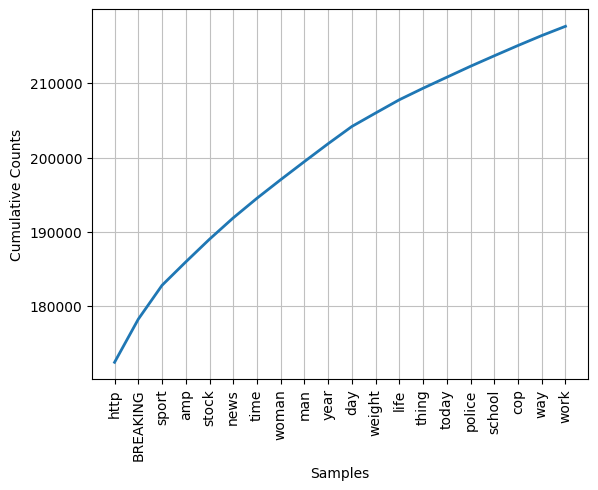

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [14]:

# top 20 words
distribution = FreqDist(noun_words)
distribution.plot(20, cumulative=True)

In [16]:
# unzip political_facts.zip
import zipfile

with zipfile.ZipFile('political_facts.zip', 'r') as zip_ref:
    zip_ref.extractall('.')


In [35]:
# read json file using pandas
df = pd.read_json('politifact_factcheck_data.json', lines=True)
df.head()

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,true,Barack Obama,John McCain opposed bankruptcy protections for...,6/11/2008,speech,Adriel Bettelheim,6/16/2008,https://www.politifact.com/factchecks/2008/jun...
1,false,Matt Gaetz,"""Bennie Thompson actively cheer-led riots in t...",6/7/2022,television,Yacob Reyes,6/13/2022,https://www.politifact.com/factchecks/2022/jun...
2,mostly-true,Kelly Ayotte,"Says Maggie Hassan was ""out of state on 30 day...",5/18/2016,news,Clay Wirestone,5/27/2016,https://www.politifact.com/factchecks/2016/may...
3,false,Bloggers,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",2/1/2021,blog,Madison Czopek,2/5/2021,https://www.politifact.com/factchecks/2021/feb...
4,half-true,Bobby Jindal,"""I'm the only (Republican) candidate that has ...",8/30/2015,television,Linda Qiu,8/30/2015,https://www.politifact.com/factchecks/2015/aug...


In [27]:
print(df.columns)

Index(['verdict', 'statement_originator', 'statement', 'statement_date',
       'statement_source', 'factchecker', 'factcheck_date',
       'factcheck_analysis_link'],
      dtype='object')


In [36]:
# get all the tweets
fact_tweets = df['statement']

# convert to string
fact_tweets = [str(tweet) for tweet in fact_tweets]

# tokenize
fact_words = word_tokenize(" ".join(fact_tweets))

In [37]:

# lemmatize
lem_fact_words = [lemmatizer.lemmatize(word) for word in fact_words]

# get junk words
good_fact_words = [word for word in lem_fact_words if word.casefold() not in stop_words]

# get nouns
fact_tags = nltk.pos_tag(good_fact_words)
fact_noun_words = [ t[0] for t in fact_tags if t[1] in ('NN','NE') and len(t[0]) > 2 ]


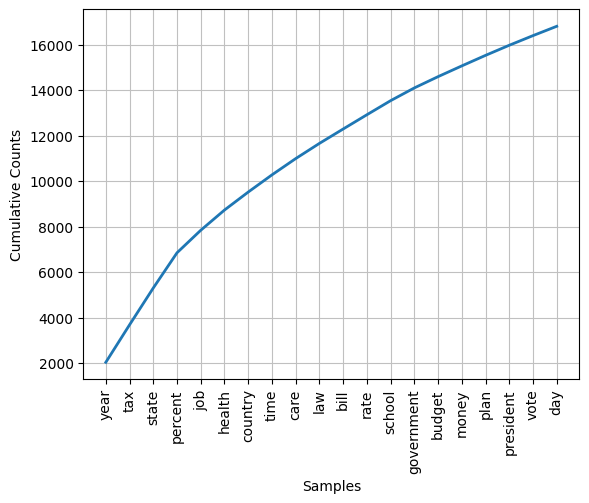

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [38]:
# top 20 words
fact_distribution = FreqDist(fact_noun_words)
fact_distribution.plot(20, cumulative=True)

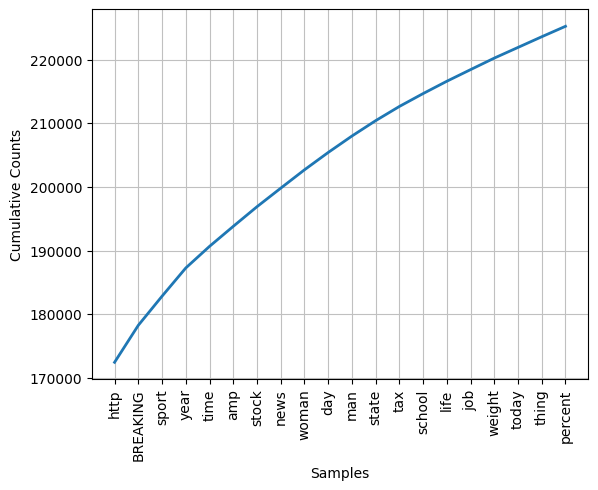

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [39]:

# merge the two lists
all_words = noun_words + fact_noun_words

# top 20 words
all_distribution = FreqDist(all_words)
all_distribution.plot(20, cumulative=True)

In [40]:
# get_count_of_statements_with_each_verdict
df['verdict'].value_counts()

false           5625
half-true       3597
mostly-false    3432
mostly-true     3332
pants-fire      2703
true            2463
Name: verdict, dtype: int64

In [41]:
# get_count_of_statements_with_each_verdict
df['factchecker'].value_counts()

Louis Jacobson      1834
Ciara O'Rourke      1298
Tom Kertscher       1199
Jon Greenberg        972
Amy Sherman          944
                    ... 
Samantha Patrick       1
Aidan Quigley          1
Jeffrey Good           1
Therese Bottomly       1
Kathryn Hardison       1
Name: factchecker, Length: 563, dtype: int64

In [46]:
# create a list of all the topics from all distributions
topics = list(all_distribution.keys())

# create a list of all the verdicts
verdicts = list(df['verdict'].value_counts().keys())

# create a count of all the topics for each verdict
verdict_topic_counts = []
for verdict in verdicts:
    # get all the tweets for the verdict
    fact_tweets = df[df['verdict'] == verdict]['statement']
    # convert to string
    fact_tweets = [str(tweet) for tweet in fact_tweets]
    # tokenize
    fact_words = word_tokenize(" ".join(fact_tweets))
    # lemmatize
    lem_fact_words = [lemmatizer.lemmatize(word) for word in fact_words]
    # get junk words
    good_fact_words = [word for word in lem_fact_words if word.casefold() not in stop_words]
    # get nouns
    fact_tags = nltk.pos_tag(good_fact_words)
    fact_noun_words = [ t[0] for t in fact_tags if t[1] in ('NN','NE') and len(t[0]) > 2 ]
    # get the counts of the topics for the verdict
    distribution = FreqDist(fact_noun_words)
    verdict_topic_counts.append([distribution[topic] for topic in topics])

# create a dataframe with the verdicts and the topic counts
verdict_topic_df = pd.DataFrame(verdict_topic_counts, columns=topics, index=verdicts)
verdict_topic_df


,cancer,patient,time,http,reason,training,//t.co/S0fIhs70sv,death,fatty,liver,...,orthodontia,flag.,satisfied.,ringside,questioning,730-million,federalism,male/female,impossibility,prekindergarten
false,21,9,143,0,14,1,0,81,0,1,...,0,0,0,0,0,0,1,1,0,0
half-true,16,4,158,0,10,8,0,30,0,0,...,1,0,0,0,1,1,0,0,0,0
mostly-false,11,16,110,0,11,4,0,38,0,0,...,0,0,0,0,0,0,0,0,0,0
mostly-true,10,9,174,0,10,3,0,30,0,0,...,0,0,1,0,0,0,0,0,0,1
pants-fire,14,8,51,0,11,2,0,31,0,0,...,0,1,0,0,0,0,0,0,1,0
true,2,4,120,0,0,1,0,41,0,0,...,0,0,0,1,0,0,0,0,0,0
